In [3]:
import os
import sys

sys.path.append(os.path.join(os.path.join(os.getcwd(), '..'), 'src'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from pprint import pprint

from consts import ROOT_DIR, DATA_DIR

In [3]:
images = os.listdir(DATA_DIR / 'seep_detection' / 'train_images_256')
masks = os.listdir(DATA_DIR / 'seep_detection' / 'train_masks_256')

print("Number of Images in the dataset:", len(images))
print("Number of Masks in the dataset:", len(masks))

Number of Images in the dataset: 790
Number of Masks in the dataset: 790


Shape of image:  (256, 256, 3)
Shape of mask:  (256, 256, 3)


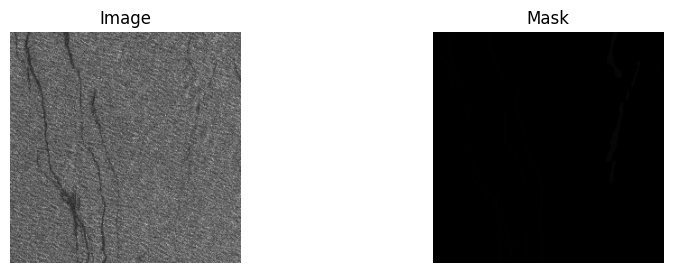

In [4]:
sample_image = cv2.imread(DATA_DIR / 'seep_detection' / 'train_images_256' / images[10])
sample_mask = cv2.imread(DATA_DIR / 'seep_detection' / 'train_masks_256' / masks[10])

print("Shape of image: ", sample_image.shape)
print("Shape of mask: ", sample_mask.shape)

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title('Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sample_mask)
plt.title('Mask')
plt.axis('off')

plt.show()

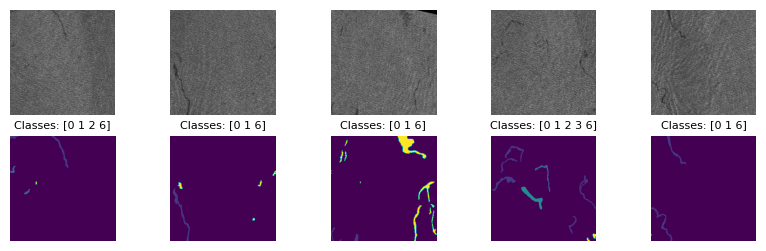

In [19]:
plt.figure(figsize=(10, 3))

i = 0
for j in range(5, 10):
    plt.subplot(2, 5, i+1)
    sample_image = cv2.imread(DATA_DIR / 'seep_detection' / 'train_images_256' / images[j])
    plt.imshow(sample_image)
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    sample_mask = cv2.imread(DATA_DIR / 'seep_detection' / 'train_masks_256' / masks[j], cv2.IMREAD_GRAYSCALE)
    sample_mask_img = (sample_mask / 8) * 255
    plt.imshow(sample_mask_img)
    plt.axis('off')
    plt.title(f"Classes: {np.unique(sample_mask)}", fontsize=8)
    i += 1
    
plt.show()
    # print(f"Classes in Image {i}: ", np.unique(sample_mask))

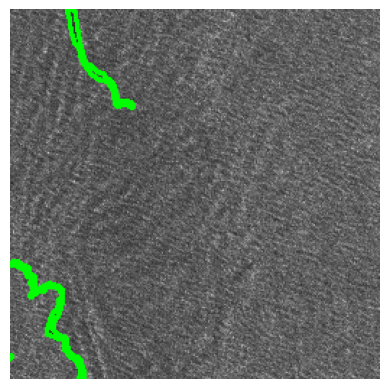

In [24]:
for cls in np.unique(sample_mask):
    print(f"Class {cls} has {np.sum(sample_mask == cls)} pixels")
    contours, _ = cv2.findContours((sample_mask == cls).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours, _ = cv2.findContours(sample_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_img = cv2.drawContours(sample_image, contours, -1, (0, 255, 0), 2)
plt.imshow(contours_img)
plt.axis('off')
plt.show()

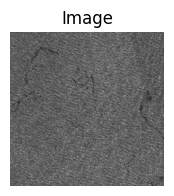

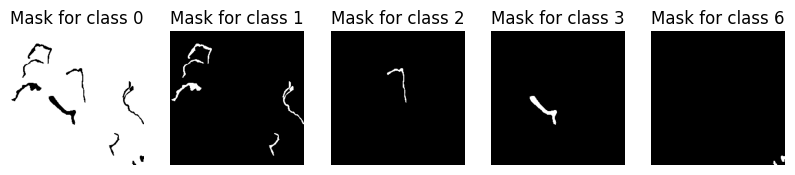

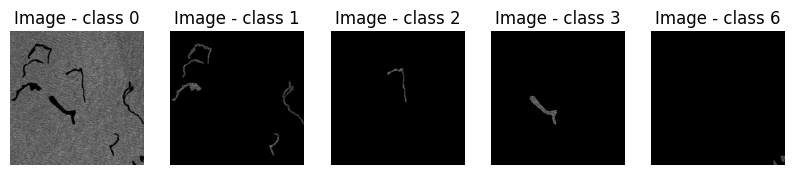

In [5]:
sample_image = cv2.imread(DATA_DIR / 'seep_detection' / 'train_images_256' / images[8])
sample_mask = cv2.imread(DATA_DIR / 'seep_detection' / 'train_masks_256' / masks[8])

plt.figure(figsize=(2, 2))
plt.imshow(sample_image)
plt.title('Image')
plt.axis('off')
plt.show()

# Plotting masks for each class
plt.figure(figsize=(10, 10))
i = 1
for cls in [0, 1, 2, 3, 6]:
    plt.subplot(1, 5, i)
    mask = np.zeros_like(sample_mask)
    mask[sample_mask == cls] = 255
    plt.imshow(mask)
    plt.title(f'Mask for class {cls}')
    plt.axis('off')
    
    i += 1

# Plotting images for each class
plt.figure(figsize=(10, 10))
i = 1
for cls in [0, 1, 2, 3, 6]:
    plt.subplot(1, 5, i)
    mask = np.zeros_like(sample_mask)
    mask[sample_mask == cls] = 1
    plt.imshow(mask * sample_image)
    plt.title(f'Image - class {cls}')
    plt.axis('off')
    
    i += 1

plt.show()

In [9]:

with open("C:\\Users\\nikhi\\Documents\\Projects\\seep_detection\\data\\seep_detection\\labels\\041869.000064.txt", "r") as f:
    polygons = f.readlines()

polygons = [list(map(float, poly.strip().split())) for poly in polygons]

classes = {}
for polygon in polygons:
    cls = int(polygon[0])
    if cls not in classes:
        classes[cls] = []
    classes[cls].append(np.array(polygon[1:]).reshape(-1, 2))
    

9 uint8


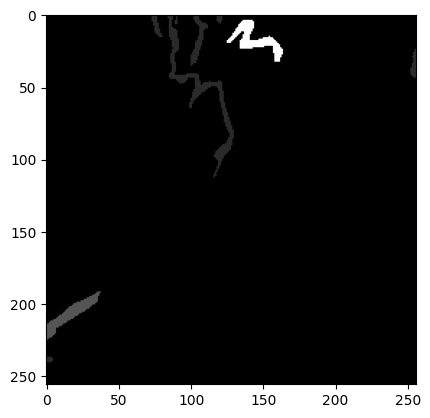

In [56]:
sample_mask = cv2.imread(DATA_DIR / 'seep_detection' / 'train_masks_256' / '041869.000064.tif', cv2.IMREAD_GRAYSCALE)
cnt, _ = cv2.findContours(
        sample_mask,
        cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE,
    )

print(len(cnt), sample_mask.dtype)

plt.imshow(sample_mask, cmap='gray')
plt.show()

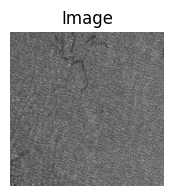

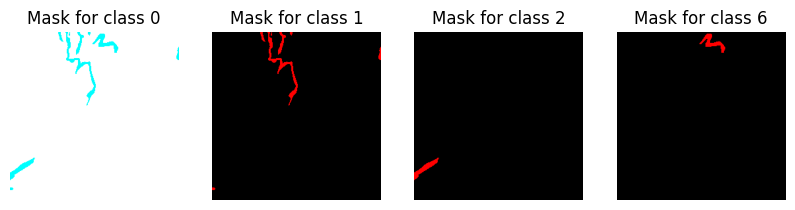

In [65]:

sample_image = cv2.imread(DATA_DIR / 'seep_detection' / 'train_images_256' / "041869.000064.tif")
sample_mask = np.zeros_like(sample_image)

size = sample_image.shape[:2]

for cls, polygons in classes.items():
    cv2.fillPoly(sample_mask, [(polygon * size).astype(np.int32) for polygon in polygons], cls)
        
plt.figure(figsize=(2, 2))
plt.imshow(sample_image)
plt.title('Image')
plt.axis('off')
plt.show()

# Plotting masks for each class
plt.figure(figsize=(10, 10))
i = 1
for cls in classes.keys():
    plt.subplot(1, len(classes), i)
    mask = np.zeros_like(sample_mask)
    mask[sample_mask == cls] = 255
    plt.imshow(mask)
    plt.title(f'Mask for class {cls}')
    plt.axis('off')
    
    i += 1

In [25]:
with open("..\\data\\seep_detection\\labels\\train\\041874.000064.txt", 'r') as f:
    polygons = f.readlines()

polygons

['0 0.171875 0.99609375 0.17578125 0.99609375\n',
 '0 0.3515625 0.76171875 0.34765625 0.765625 0.34375 0.765625 0.33984375 0.76953125 0.33984375 0.7734375 0.3359375 0.77734375 0.3359375 0.78515625 0.33203125 0.7890625 0.33203125 0.796875 0.328125 0.80078125 0.328125 0.80859375 0.32421875 0.8125 0.32421875 0.81640625 0.3203125 0.8203125 0.3203125 0.82421875 0.3125 0.83203125 0.3125 0.8359375 0.30859375 0.83984375 0.30859375 0.84375 0.3046875 0.84765625 0.3046875 0.85546875 0.29296875 0.8671875 0.28515625 0.8671875 0.27734375 0.875 0.28125 0.87890625 0.28125 0.93359375 0.27734375 0.9375 0.27734375 0.9453125 0.2734375 0.94921875 0.2734375 0.95703125 0.26953125 0.9609375 0.26953125 0.96484375 0.265625 0.96875 0.265625 0.9765625 0.2578125 0.984375 0.2578125 0.98828125 0.25 0.99609375 0.3046875 0.99609375 0.3046875 0.9921875 0.30078125 0.98828125 0.30078125 0.984375 0.30859375 0.9765625 0.328125 0.9765625 0.3359375 0.984375 0.3359375 0.9921875 0.33984375 0.99609375 0.34765625 0.99609375 0.34

In [26]:
mask = cv2.imread("..\\data\\seep_detection\\train_masks_256\\041874.000064.tif", cv2.IMREAD_GRAYSCALE)
np.unique(mask)

array([0, 1, 6], dtype=uint8)

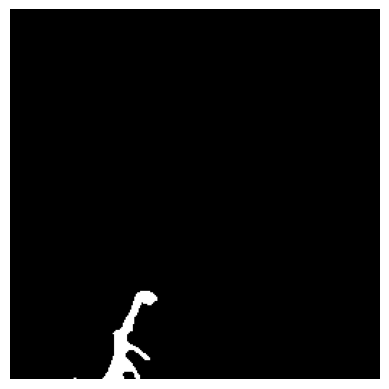

In [27]:
plt.imshow((mask == 1).astype(np.uint8), cmap='gray')
plt.axis('off')
plt.show()

In [29]:
cont = np.array([[0.171875, 0.99609375], [0.17578125, 0.99609375]]) * 256
cont

array([[ 44., 255.],
       [ 45., 255.]])

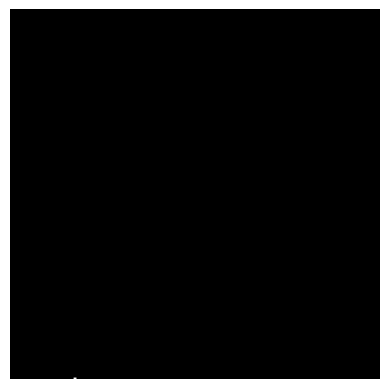

In [30]:
new_mask = np.zeros_like(mask)
new_mask = cv2.fillPoly(new_mask, [cont.astype(np.int32)], 1)

plt.imshow(new_mask, cmap='gray')
plt.axis('off')
plt.show()